In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/electric.csv') 
df.columns = ['index','product','use'] 
df

,index,product,use
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [3]:
del df['index']

In [4]:
df

,product,use
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98
5,3.98,3.05
6,4.29,3.18
7,4.83,3.46
8,3.71,3.03
9,4.61,3.25


<function matplotlib.pyplot.show(*args, **kw)>

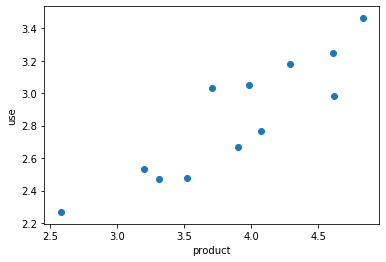

In [5]:
plt.xlabel('product')
plt.ylabel('use')
plt.scatter(df['product'],df['use']) 
plt.show

In [6]:
x = tf.placeholder(tf.float32) 
y = tf.constant(df['use'], tf.float32)

In [7]:
w = tf.Variable(tf.random_uniform([1])) #랜덤하게 벡터값을 한개 준다
b = tf.Variable(tf.random_uniform([1]))

In [8]:
hx = w*x + b #예측값
cost = tf.reduce_mean(tf.square(hx-y))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.001) #Learning rate
train = optimizer.minimize(cost)

In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
for i in range(10000):
    sess.run(train,{x:df['product']}) 
    if i%100==0:
        print(i,sess.run(cost,{x:df['product']}))

0 0.07985059
100 0.04423287
200 0.044003915
300 0.043820333
400 0.043638628
500 0.04345865
600 0.04328044
700 0.043103974
800 0.042929206
900 0.042756166
1000 0.042584807
1100 0.042415082
1200 0.042247046
1300 0.04208064
1400 0.041915834
1500 0.041752636
1600 0.041591045
1700 0.041431017
1800 0.041272536
1900 0.041115586
2000 0.040960204
2100 0.040806346
2200 0.040653933
2300 0.040503025
2400 0.040353585
2500 0.0402056
2600 0.040059045
2700 0.03991394
2800 0.039770223
2900 0.03962793
3000 0.039487004
3100 0.039347455
3200 0.039209258
3300 0.03907241
3400 0.038936898
3500 0.038802702
3600 0.038669813
3700 0.03853821
3800 0.03840791
3900 0.038278837
4000 0.03815106
4100 0.03802452
4200 0.037899196
4300 0.0377751
4400 0.037652224
4500 0.037530515
4600 0.03741
4700 0.03729068
4800 0.037172507
4900 0.037055466
5000 0.036939595
5100 0.036824834
5200 0.03671119
5300 0.036598664
5400 0.036487225
5500 0.036376875
5600 0.03626761
5700 0.036159378
5800 0.0360522
5900 0.03594609
6000 0.035840984
6

In [12]:
sess.run(w)

array([0.62804925], dtype=float32)

In [13]:
sess.run(b)

array([0.39213172], dtype=float32)

In [14]:
sess.run(hx,{x:40})

array([25.514103], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

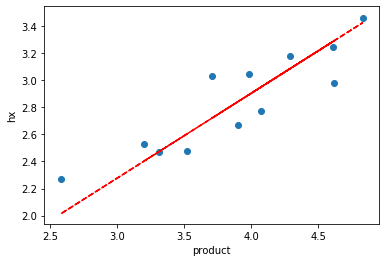

In [16]:
plt.xlabel('product')
plt.ylabel('use')
plt.scatter(df['product'],df['use']) 
plt.xlabel('product')
plt.ylabel('hx')
plt.plot(df['product'],sess.run(hx,{x:df['product']}),'r--') 
plt.show